# Comparing Air Pollution, NTL, Agriculture and Conflict

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
eth_adm0 = gpd.read_file('../../data/boundaries/eth_admbnda_adm0_csa_bofedb_itos_2021.shp')
eth_adm1 = gpd.read_file('../../data/boundaries/eth_admbnda_adm1_csa_bofedb_2021.shp')
eth_adm2 = gpd.read_file('../../data/boundaries/eth_admbnda_adm2_csa_bofedb_2021.shp')
eth_adm3 = gpd.read_file('../../data/boundaries/eth_admbnda_adm3_csa_bofedb_2021.shp')

In [3]:
eth_adm0_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level0.shp')
eth_adm1_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level1.shp')
eth_adm2_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level2.shp')
#eth_adm3_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level3.shp')

In [4]:
evi_adm0_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm0.csv')
evi_adm1_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm1.csv')
evi_adm0_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm0.csv')
evi_adm1_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm1.csv')

In [5]:
evi_adm0_annual['date'] = pd.to_datetime(evi_adm0_annual['date'])
evi_adm0_annual.rename(columns={'mean': 'evi_median'}, inplace=True)

In [6]:
airpollution_adm1 = pd.read_csv('../../data/air_pollution/processed/air_pollution_monthly_adm1_2019_2024.csv')
airpollution_adm2 = pd.read_csv('../../data/air_pollution/processed/air_pollution_monthly_adm2_2019_2024.csv')
airpollution_adm3 = pd.read_csv('../../data/air_pollution/processed/eth_adm3_no2_monthly_2019_2024.csv')

C:\Users\wb588851\AppData\Local\Temp\ipykernel_26556\4010708093.py:3: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  airpollution_adm3 = pd.read_csv('../../data/air_pollution/processed/eth_adm3_no2_monthly_2019_2024.csv')


In [7]:
airpollution_adm0 = airpollution_adm1.groupby(['ADM0_EN', 'event_date'])['NO2'].mean().reset_index()

In [ ]:
airpollution_adm0.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm1.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm2.rename(columns={'event_date': 'date'}, inplace=True)

In [103]:
airpollution_adm0_annual = airpollution_adm0.groupby(['ADM0_EN', pd.Grouper(key='date', freq='YS')])['NO2'].mean().reset_index()

In [14]:
conflict = pd.read_csv('../../data/conflict/acled_raw_20250506.csv')
conflict.rename(columns={'nrFatalities': 'fatalities'}, inplace=True)
analysis.data_type_conversion(conflict)

In [98]:
from acled_conflict_analysis import analysis

conflict_adm0_monthly = analysis.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='MS')
conflict_adm1_monthly = analysis.get_acled_by_admin(eth_adm1, conflict, ['ADM1_EN'], freq='MS')
conflict_adm2_monthly = analysis.get_acled_by_admin(eth_adm2, conflict, ['ADM1_EN', 'ADM2_EN'], freq='MS')
conflict_adm3_monthly = analysis.get_acled_by_admin(eth_adm3, conflict, ['ADM1_EN', 'ADM2_EN', 'ADM3_EN'], freq='MS')

In [99]:
import numpy as np
def get_conflict_index(df):
    df['conflict_index'] = np.sqrt((df['nrEvents']) * (df['nrFatalities'] + 1))

    return df

In [95]:
conflict_adm0_annual = analysis.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='YS')
conflict_adm1_annual = analysis.get_acled_by_admin(eth_adm1, conflict, ['ADM1_EN'], freq='YS')
conflict_adm2_annual = analysis.get_acled_by_admin(eth_adm2, conflict, ['ADM1_EN', 'ADM2_EN'], freq='YS')
conflict_adm3_annual = analysis.get_acled_by_admin(eth_adm3, conflict, ['ADM1_EN', 'ADM2_EN', 'ADM3_EN'], freq='YS')

In [96]:
conflict_adm0_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm1_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm2_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm3_annual.rename(columns={'event_date': 'date'}, inplace=True)

In [65]:
conflict_adm0_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm1_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm2_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm3_monthly.rename(columns={'event_date': 'date'}, inplace=True)

In [101]:
conflict_adm0_monthly = get_conflict_index(conflict_adm0_monthly)
conflict_adm0_annual = get_conflict_index(conflict_adm0_annual)

In [9]:
ntl_adm0_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm0_monthly_2012_2024.csv')
ntl_adm1_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm1_monthly_2012_2024.csv')
ntl_adm2_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm2_monthly_2012_2024.csv')

In [ ]:
ntl_adm0_annual = ntl_adm0_monthly.groupby(['ADM0_EN', pd.Grouper(key='date', freq='YS')])[['ntl_sum']].sum().reset_index()

In [179]:
evi_adm0_annual.rename(columns={'admin_area': 'ADM0_EN'}, inplace=True)

In [180]:
merged = pd.merge(airpollution_adm0_annual, conflict_adm0_annual, on=['date', 'ADM0_EN'], how='left')
merged.drop(columns=['index'], inplace=True)

merged = pd.merge(merged, ntl_adm0_annual[['ADM0_EN', 'date', 'ntl_sum']], on=['date', 'ADM0_EN'], how='left')
merged = pd.merge(merged, evi_adm0_annual, on=['date', 'ADM0_EN'], how='left')

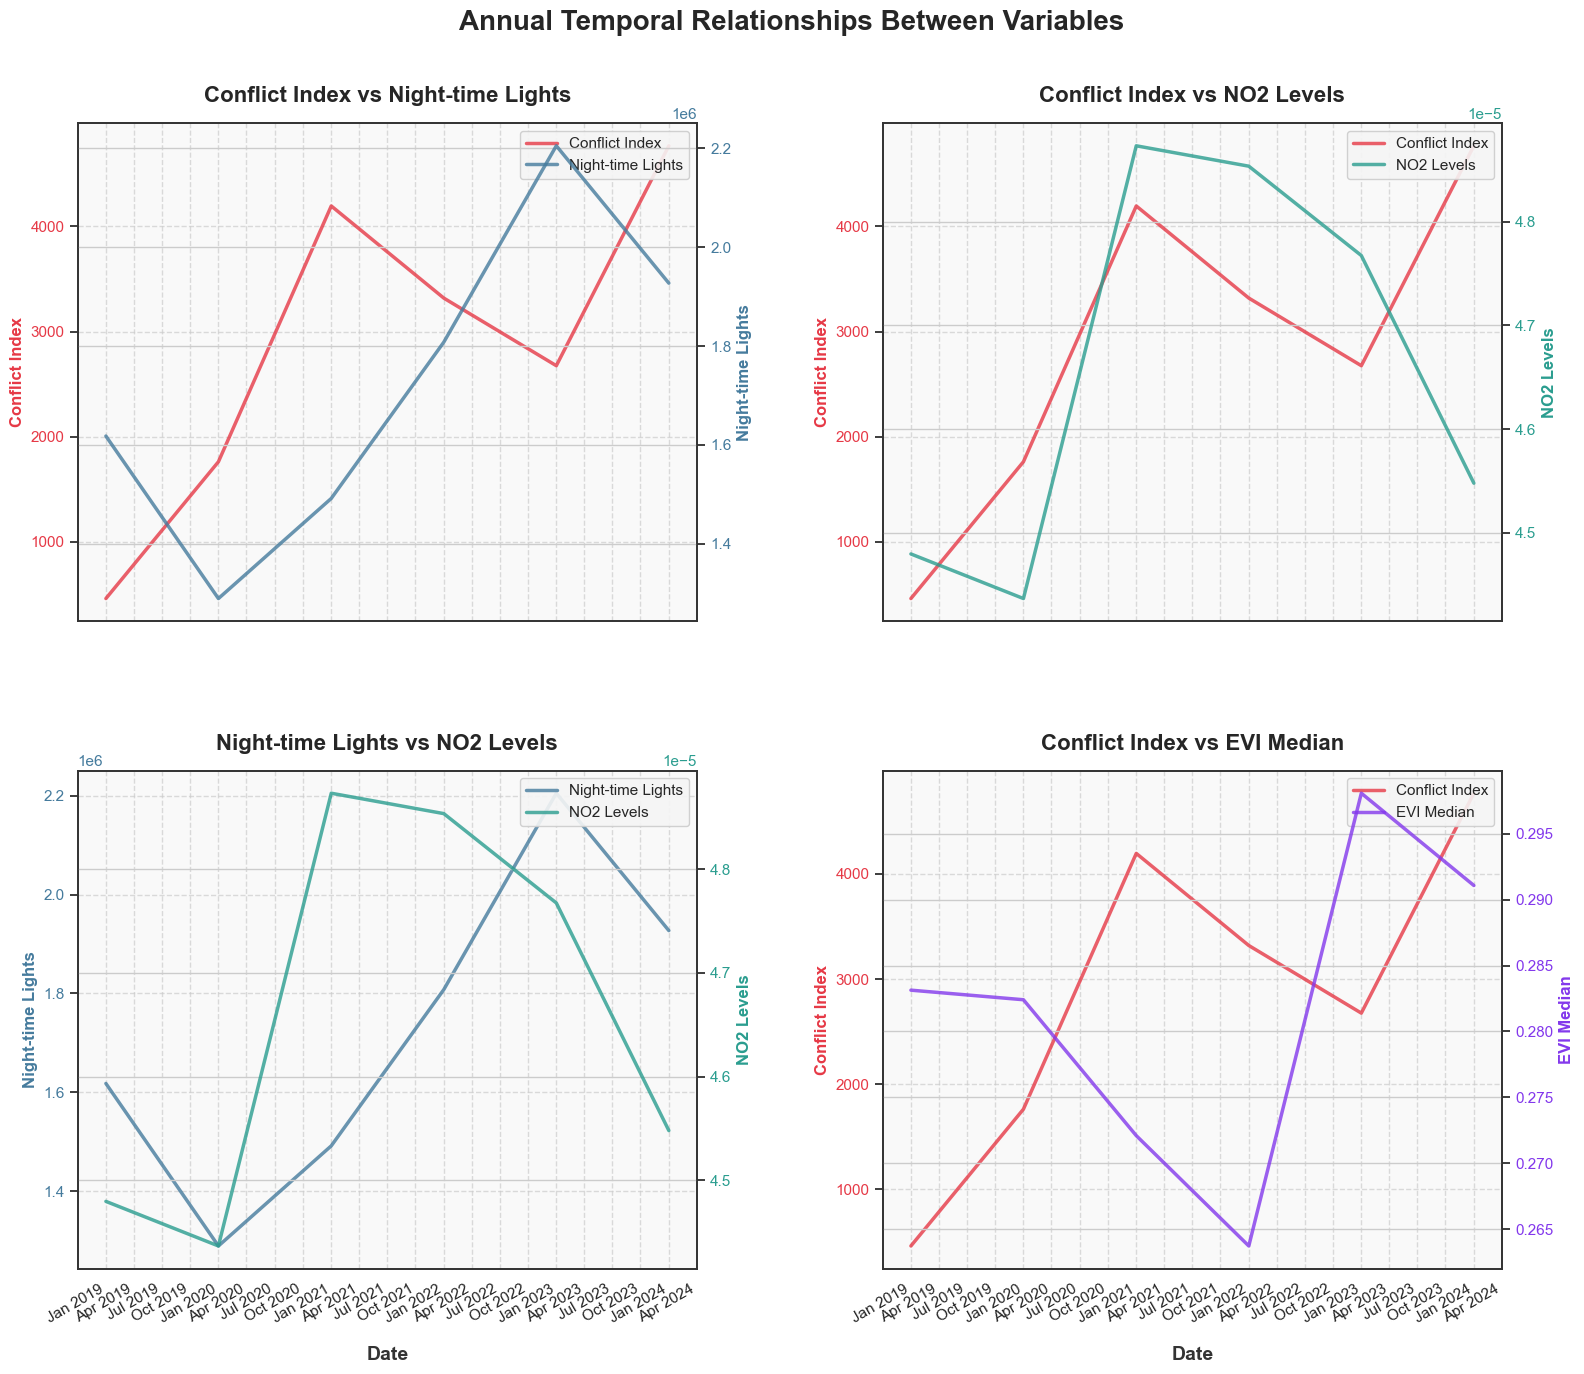

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Set the style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = merged.copy()

# Set up a color palette
colors = {'conflict': '#E63946', 'ntl': '#457B9D', 'no2': '#2A9D8F', 'evi': '#8338EC'}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Function to format axis
def format_axis(ax, title, color1, color2):
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a subtle background color to highlight the plot area
    ax.set_facecolor('#f9f9f9')
    
    # Format date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Plot 1: Conflict vs NTL
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax1, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax1_twin, label='Night-time Lights', linewidth=2.5, alpha=0.8)

format_axis(ax1, 'Conflict Index vs Night-time Lights', colors['conflict'], colors['ntl'])
ax1.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax1_twin.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=colors['ntl'])
ax1.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax1.get_legend().get_frame().set_edgecolor('#cccccc')
ax1_twin.get_legend().remove()

# Plot 2: Conflict vs NO2
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax2, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax2_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax2, 'Conflict Index vs NO2 Levels', colors['conflict'], colors['no2'])
ax2.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax2_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax2.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax2.get_legend().get_frame().set_edgecolor('#cccccc')
ax2_twin.get_legend().remove()

# Plot 3: NTL vs NO2
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax3, label='Night-time Lights', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax3_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax3, 'Night-time Lights vs NO2 Levels', colors['ntl'], colors['no2'])
ax3.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax3_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax3.tick_params(axis='y', labelcolor=colors['ntl'])

# Create a combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax3.get_legend().get_frame().set_edgecolor('#cccccc')
ax3_twin.get_legend().remove()

# Plot 4: Conflict vs EVI Median (new plot)
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax4, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='evi_median', data=df, color=colors['evi'], 
             ax=ax4_twin, label='EVI Median', linewidth=2.5, alpha=0.8)

format_axis(ax4, 'Conflict Index vs EVI Median', colors['conflict'], colors['evi'])
ax4.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax4_twin.set_ylabel('EVI Median', fontsize=12, color=colors['evi'], fontweight='bold')
ax4_twin.tick_params(axis='y', labelcolor=colors['evi'])
ax4.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax4.get_legend().get_frame().set_edgecolor('#cccccc')
ax4_twin.get_legend().remove()

# Add a dataset title
plt.suptitle('Annual Temporal Relationships Between Variables', 
             fontsize=20, fontweight='bold', y=0.98)

# Add x-axis label to the bottom subplot only
axes[1, 0].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)
axes[1, 1].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add subtle shadow to figure
plt.savefig('../../docs/images/temporal_relationships.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

In [183]:
gdp = pd.read_csv('../../data/general/eth_gdp.csv')
gdp['Year'] = pd.to_datetime(gdp['Year'])
gdp.rename(columns={'Year':'date'}, inplace=True)

In [184]:
merged = merged.merge(gdp, on=['date'])

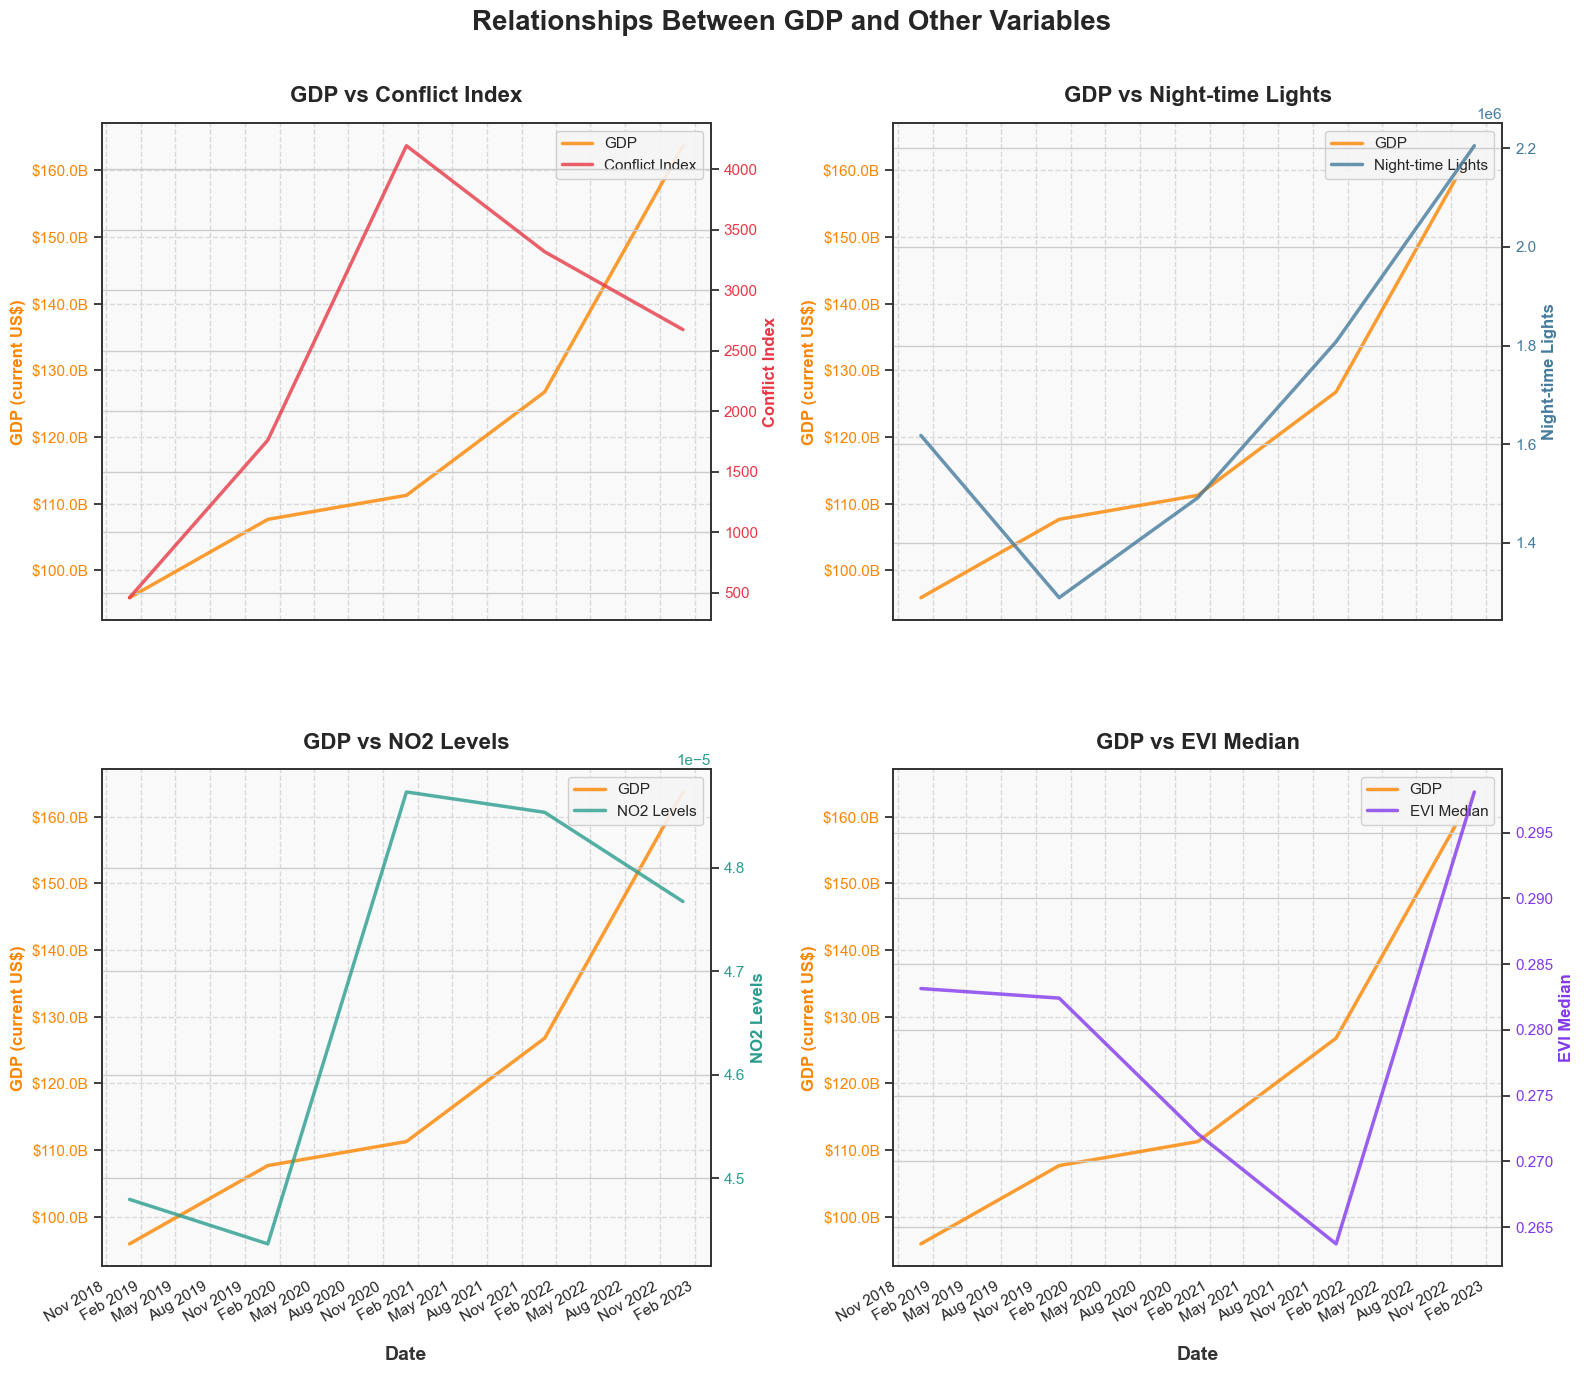

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Set the style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = merged.copy()

# Set up a color palette
colors = {'conflict': '#E63946', 'ntl': '#457B9D', 'no2': '#2A9D8F', 'evi': '#8338EC', 'gdp': '#FB8500'}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Function to format axis and create GDP twin axis
def format_axis(ax, title, color1, color2):
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a subtle background color to highlight the plot area
    ax.set_facecolor('#f9f9f9')
    
    # Format date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Function to format GDP values (in billions)
def billions_formatter(x, pos):
    return f'${x/1e9:.1f}B'

# Plot 1: GDP vs Conflict Index
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax1, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax1_twin, label='Conflict Index', linewidth=2.5, alpha=0.8)

format_axis(ax1, 'GDP vs Conflict Index', colors['gdp'], colors['conflict'])
ax1.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax1_twin.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=colors['conflict'])
ax1.tick_params(axis='y', labelcolor=colors['gdp'])
ax1.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax1.get_legend().get_frame().set_edgecolor('#cccccc')
ax1_twin.get_legend().remove()

# Plot 2: GDP vs NTL
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax2, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax2_twin, label='Night-time Lights', linewidth=2.5, alpha=0.8)

format_axis(ax2, 'GDP vs Night-time Lights', colors['gdp'], colors['ntl'])
ax2.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax2_twin.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=colors['ntl'])
ax2.tick_params(axis='y', labelcolor=colors['gdp'])
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax2.get_legend().get_frame().set_edgecolor('#cccccc')
ax2_twin.get_legend().remove()

# Plot 3: GDP vs NO2
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax3, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax3_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax3, 'GDP vs NO2 Levels', colors['gdp'], colors['no2'])
ax3.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax3_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax3.tick_params(axis='y', labelcolor=colors['gdp'])
ax3.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax3.get_legend().get_frame().set_edgecolor('#cccccc')
ax3_twin.get_legend().remove()

# Plot 4: GDP vs EVI Median
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax4, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='evi_median', data=df, color=colors['evi'], 
             ax=ax4_twin, label='EVI Median', linewidth=2.5, alpha=0.8)

format_axis(ax4, 'GDP vs EVI Median', colors['gdp'], colors['evi'])
ax4.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax4_twin.set_ylabel('EVI Median', fontsize=12, color=colors['evi'], fontweight='bold')
ax4_twin.tick_params(axis='y', labelcolor=colors['evi'])
ax4.tick_params(axis='y', labelcolor=colors['gdp'])
ax4.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax4.get_legend().get_frame().set_edgecolor('#cccccc')
ax4_twin.get_legend().remove()

# Add a dataset title
plt.suptitle('Relationships Between GDP and Other Variables', 
             fontsize=20, fontweight='bold', y=0.98)

# Add x-axis label to the bottom subplot only
axes[1, 0].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)
axes[1, 1].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add subtle shadow to figure
plt.savefig('../../docs/images/gdp_relationships.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

In [187]:
import geopandas as gpd
import pyproj
from shapely.ops import transform
from functools import partial

def get_crosswalk(gadm_boundaries, hdx_boundaries, gadm_keys, hdx_keys):
    
    # Ensure same coordinate reference system
    gadm_boundaries = gadm_boundaries.to_crs(hdx_boundaries.crs)
    
    # Get the original CRS
    orig_crs = gadm_boundaries.crs
    
    # Join based on spatial overlap
    crosswalk = gpd.sjoin(
        gadm_boundaries[['geometry'] + gadm_keys], 
        hdx_boundaries[['geometry'] + hdx_keys], 
        how="inner", 
        predicate="intersects"
    )
    # if 'index_right' in crosswalk.columns:
    #     crosswalk.drop(columns=['index_right'], inplace=True)
    # # Set up an equal-area projection for accurate area calculation
    # Use a suitable projection for your study area (UTM zone, equal area, etc.)
    # This example uses World Equidistant Cylindrical
    project_to_equal_area = pyproj.Transformer.from_proj(
        pyproj.Proj(orig_crs),  # source coordinate system
        pyproj.Proj("+proj=eqc +lat_ts=0 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"),  # target coordinate system
        always_xy=True
    )
    
    # Function to calculate area in square kilometers
    def get_area_sq_km(geom):
        # Project the geometry to equal area projection
        geom_proj = transform(project_to_equal_area.transform, geom)
        # Return area in square kilometers
        return geom_proj.area / 1_000_000  # Convert square meters to square km
    
    # Calculate GADM unit areas for percentage calculation
    crosswalk['gadm_area'] = crosswalk['geometry'].apply(get_area_sq_km)
    
    # Calculate intersection areas
    crosswalk['intersection_area'] = crosswalk.apply(
        lambda row: get_area_sq_km(
            row['geometry'].intersection(
                hdx_boundaries.loc[row.index_right, 'geometry']
            )
        ), 
        axis=1
    )
    
    # Calculate overlap percentage relative to GADM area
    crosswalk['overlap_percentage'] = (crosswalk['intersection_area'] / crosswalk['gadm_area']) * 100
    
    # Filter to keep only high-quality matches (e.g., >70% overlap)
    filtered_crosswalk = crosswalk[crosswalk['overlap_percentage'] > 50]
    
    # Return only necessary columns, avoiding duplicates
    return filtered_crosswalk[ gadm_keys + hdx_keys+['intersection_area', 'overlap_percentage']].drop_duplicates()

In [167]:
crosswalk_adm1 = get_crosswalk(eth_adm1_gadm, eth_adm1, gadm_keys=['GID_1', 'NAME_1'], hdx_keys=['ADM1_PCODE', 'ADM1_EN'])
crosswalk_adm2 = get_crosswalk(eth_adm2_gadm, eth_adm2, gadm_keys=['GID_2', 'NAME_2'], hdx_keys=['ADM2_PCODE', 'ADM2_EN'])

<Axes: >

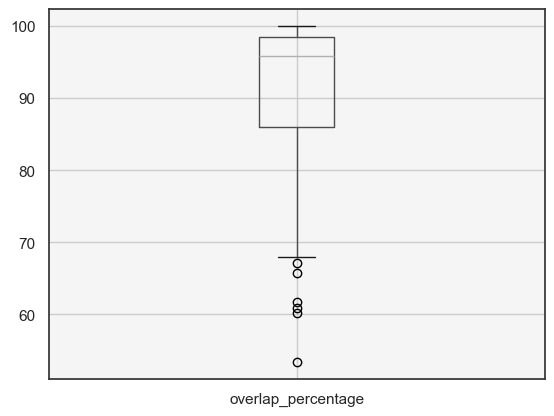

In [170]:
crosswalk_adm2[['overlap_percentage']].boxplot()

In [161]:
ntl_adm1_monthly_hdx = pd.merge(
    ntl_adm1_monthly,
    crosswalk_adm1[['GID_1', 'ADM1_PCODE', 'ADM1_EN']],  # Adjust column names as needed
    left_on='GID_1',  # Your GADM identifier in the NTL dataset
    right_on='GID_1',  
    how='left'
)

In [172]:
ntl_adm2_monthly_hdx = pd.merge(
    ntl_adm2_monthly,
    crosswalk_adm2[['GID_2', 'ADM2_PCODE', 'ADM2_EN']],  # Adjust column names as needed
    left_on='GID_2',  # Your GADM identifier in the NTL dataset
    right_on='GID_2',  
    how='left'
)

In [ ]:
conflict_adm1_monthly.rename(columns={'event_date':'date'}, inplace=True)
evi_adm1_monthly.rename(columns={'mean':'evi_median'}, inplace=True)

airpollution_adm1['date'] = pd.to_datetime(airpollution_adm1['date'])
ntl_adm1_monthly_hdx['date'] = pd.to_datetime(ntl_adm1_monthly_hdx['date'])
evi_adm1_monthly.rename(columns={'admin_area':'ADM1_EN'}, inplace=True)
evi_adm1_monthly['date'] = pd.to_datetime(evi_adm1_monthly['date'])
conflict_adm1_monthly = get_conflict_index(conflict_adm1_monthly)

In [229]:
conflict_adm2_monthly.rename(columns={'event_date':'date'}, inplace=True)

airpollution_adm2['date'] = pd.to_datetime(airpollution_adm2['date'])
ntl_adm2_monthly_hdx['date'] = pd.to_datetime(ntl_adm2_monthly_hdx['date'])
# evi_adm1_monthly.rename(columns={'admin_area':'ADM1_EN'}, inplace=True)
# evi_adm1_monthly['date'] = pd.to_datetime(evi_adm1_monthly['date'])
conflict_adm2_monthly = get_conflict_index(conflict_adm2_monthly)

In [211]:
merged_adm1 = pd.merge(airpollution_adm1, conflict_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm1.drop(columns=['index'], inplace=True)

merged_adm1 = pd.merge(merged_adm1, ntl_adm1_monthly_hdx[['date', 'ntl_sum', 'ADM1_EN']], on=['date', 'ADM1_EN'], how='left')
merged_adm1 = pd.merge(merged_adm1, evi_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm1.drop(columns={'Unnamed: 0'}, inplace=True)

In [232]:
merged_adm2 = pd.merge(airpollution_adm2, conflict_adm2_monthly, on=['date', 'ADM1_EN', 'ADM2_EN'], how='left')
merged_adm2.drop(columns=['index'], inplace=True)

merged_adm2 = pd.merge(merged_adm2, ntl_adm2_monthly_hdx[['date', 'ntl_sum', 'ADM2_EN']], on=['date', 'ADM2_EN'], how='left')
#merged_adm2 = pd.merge(merged_adm2, evi_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm2.drop(columns={'Unnamed: 0'}, inplace=True)

## Spatial Correlations

### Regional Level

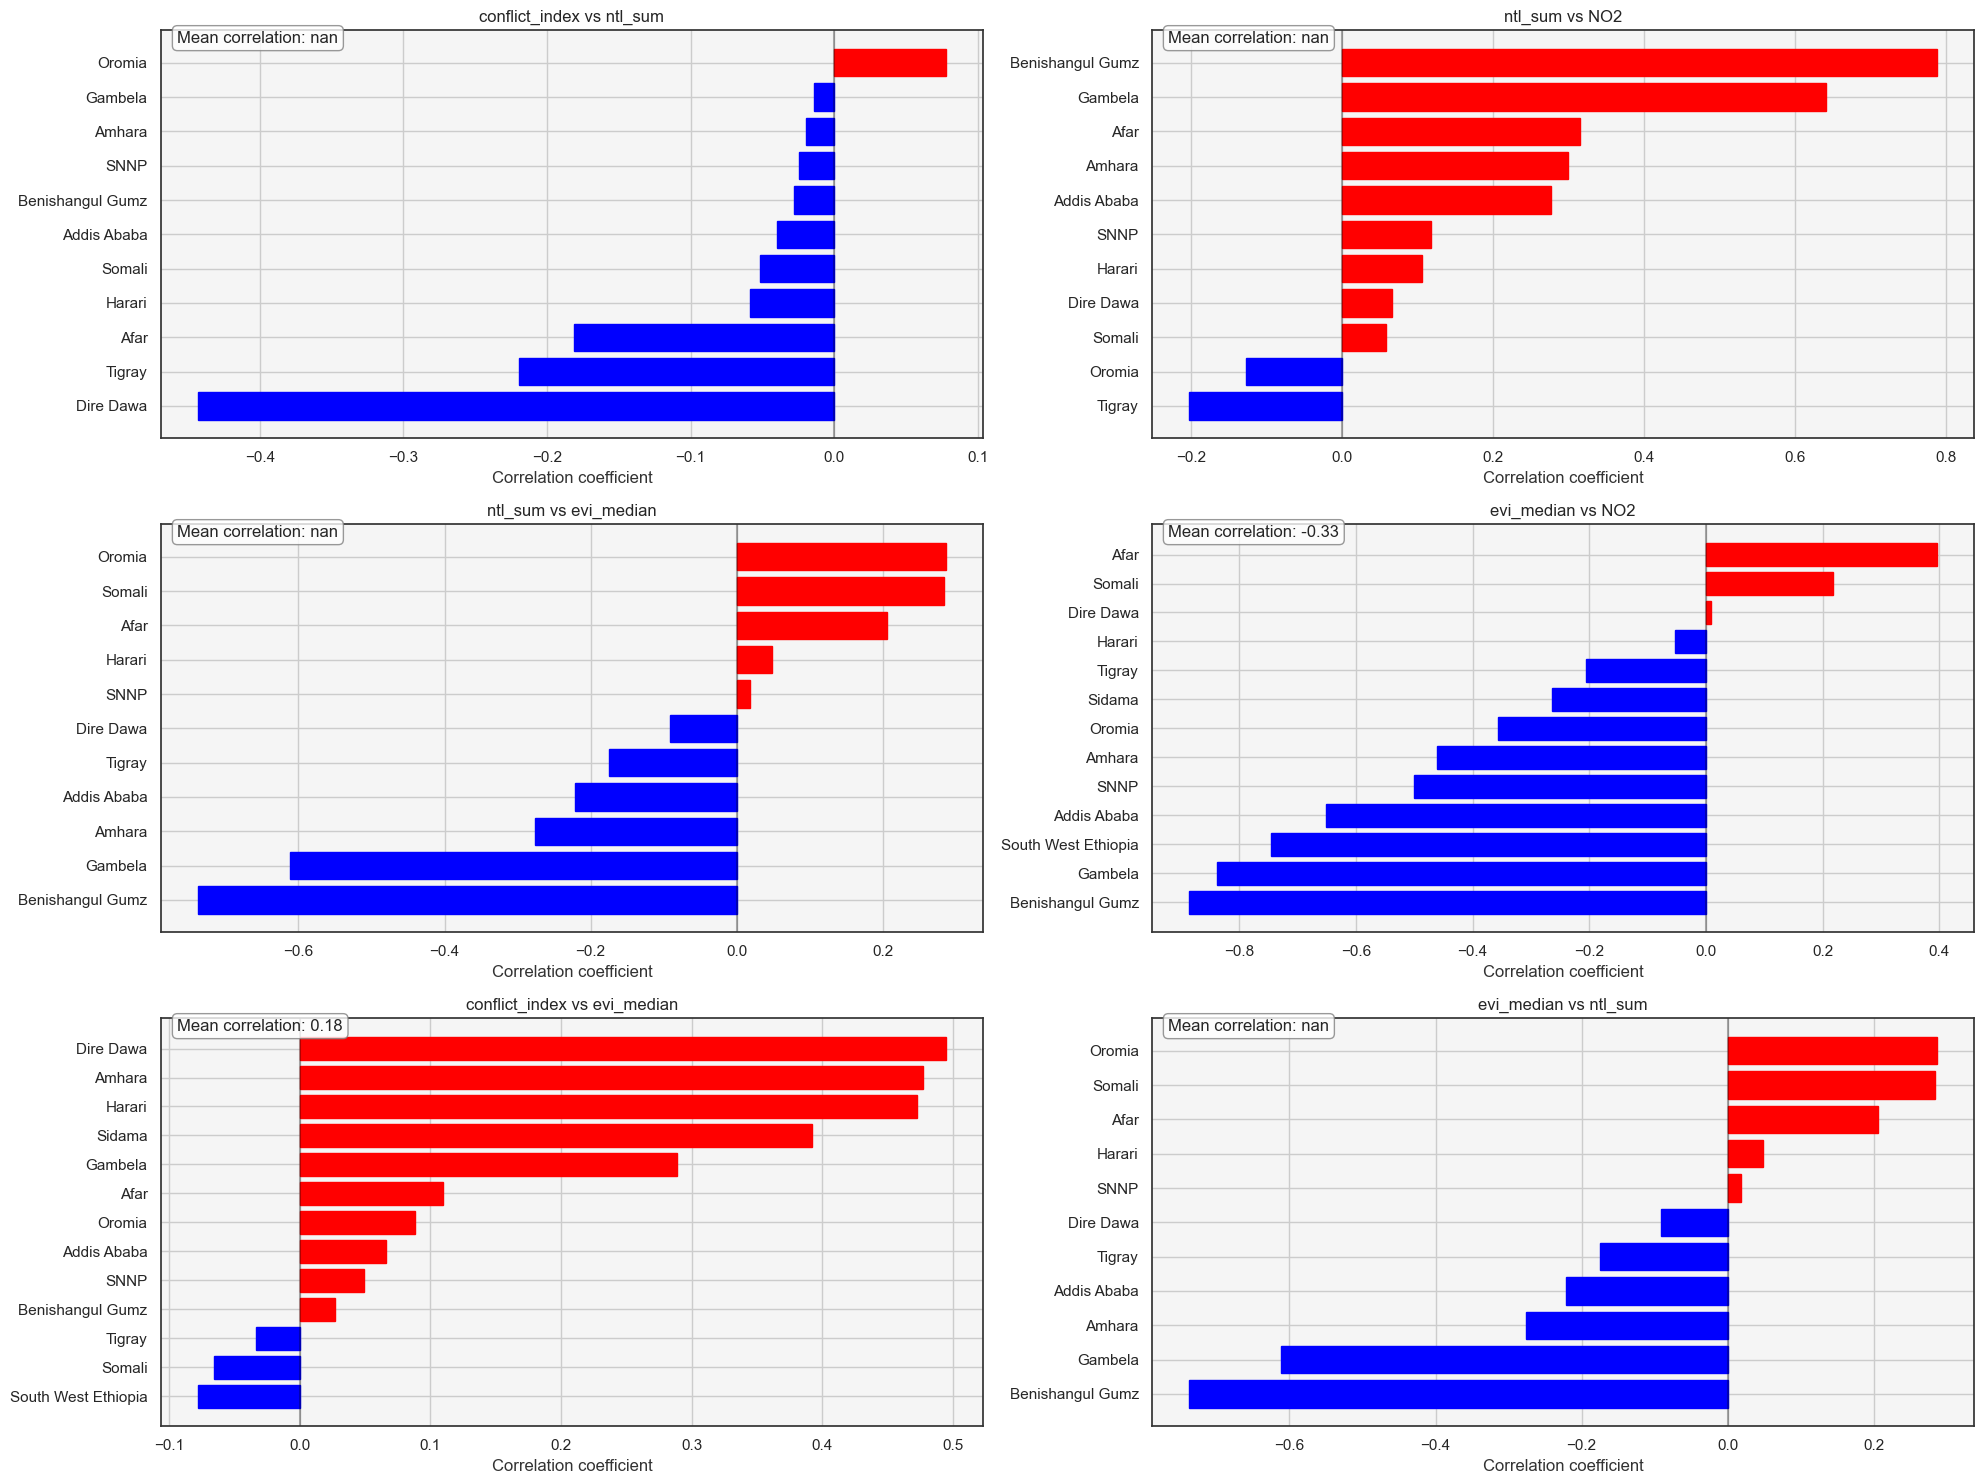

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.gridspec import GridSpec

# Assuming df is your DataFrame with the columns mentioned
# Variables of interest for correlation analysis


# Step 1: Group data by administrative regions
def analyze_regional_correlations(df, admin_level='ADM1_EN'):
    # Dictionary to store correlation matrices for each region
    region_correlations = {}
    
    # Get unique regions
    regions = df[admin_level].unique()
    
    # Calculate correlation matrix for each region
    for region in regions:
        region_data = df[df[admin_level] == region][variables_of_interest]
        
        # Only calculate correlation if we have sufficient data points
        if len(region_data) > 5:  # Arbitrary threshold, adjust as needed
            corr_matrix = region_data.corr()
            region_correlations[region] = corr_matrix
    
    return region_correlations

# Step 2: Analyze correlation patterns across regions
def analyze_correlation_patterns(region_correlations):
    variable_pairs = []
    for var1 in variables_of_interest:
        for var2 in variables_of_interest:
            if var1 < var2:  # Avoid duplicate pairs
                variable_pairs.append((var1, var2))
    
    pair_correlations = defaultdict(list)
    
    for region, corr_matrix in region_correlations.items():
        for var1, var2 in variable_pairs:
            if var1 in corr_matrix.columns and var2 in corr_matrix.columns:
                pair_correlations[(var1, var2)].append(corr_matrix.loc[var1, var2])
    
    # Calculate mean and std of correlations across regions
    correlation_stats = {}
    for pair, values in pair_correlations.items():
        if values:  # Check if list is not empty
            correlation_stats[pair] = {
                'mean': np.mean(values),
                'std': np.std(values),
                'min': np.min(values),
                'max': np.max(values),
                'count': len(values)
            }
    
    return correlation_stats

# Function to plot a correlation matrix for a specific region
def plot_region_correlation(corr_matrix, region_name):
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Matrix for {region_name}')
    plt.tight_layout()
    return fig

# Function to visualize correlation distribution for a specific variable pair across regions
def plot_correlation_distribution(region_correlations, var1, var2):
    correlations = []
    regions = []
    
    for region, corr_matrix in region_correlations.items():
        if var1 in corr_matrix.columns and var2 in corr_matrix.columns:
            correlations.append(corr_matrix.loc[var1, var2])
            regions.append(region)
    
    # Sort regions by correlation strength
    sorted_indices = np.argsort(correlations)
    sorted_regions = [regions[i] for i in sorted_indices]
    sorted_correlations = [correlations[i] for i in sorted_indices]
    
    fig = plt.figure(figsize=(12, 8))
    bars = plt.barh(sorted_regions, sorted_correlations)
    
    # Color bars based on correlation value
    for i, bar in enumerate(bars):
        if sorted_correlations[i] < 0:
            bar.set_color('blue')
        else:
            bar.set_color('red')
            
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel(f'Correlation between {var1} and {var2}')
    plt.ylabel('Administrative Region')
    plt.title(f'Distribution of {var1}-{var2} Correlation Across Regions')
    plt.tight_layout()
    return fig

# Function to create subplot grid of correlation distributions for multiple pairs
def plot_multiple_correlation_distributions(region_correlations, variable_pairs):
    """
    Create a subplot grid showing correlation distributions for multiple variable pairs
    
    Parameters:
    - region_correlations: Dictionary mapping regions to correlation matrices
    - variable_pairs: List of tuples, each containing two variable names to correlate
    
    Returns:
    - fig: Matplotlib figure containing all subplots
    """
    # Calculate number of rows and columns for subplots
    n_pairs = len(variable_pairs)
    n_cols = 2  # You can adjust this
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    # Create figure and subplots
    fig = plt.figure(figsize=(20, 5 * n_rows))
    
    # Create subplots
    for i, (var1, var2) in enumerate(variable_pairs):
        plt.subplot(n_rows, n_cols, i+1)
        
        correlations = []
        regions = []
        
        for region, corr_matrix in region_correlations.items():
            if var1 in corr_matrix.columns and var2 in corr_matrix.columns:
                correlations.append(corr_matrix.loc[var1, var2])
                regions.append(region)
        
        # Only proceed if we have correlations to plot
        if correlations:
            # Sort regions by correlation strength
            sorted_indices = np.argsort(correlations)
            # Limit to top 15 and bottom 15 regions for readability if there are many regions
            if len(sorted_indices) > 30:
                # Get 15 strongest positive and 15 strongest negative correlations
                bottom_indices = sorted_indices[:15]
                top_indices = sorted_indices[-15:]
                sorted_indices = np.concatenate([bottom_indices, top_indices])
                
            sorted_regions = [regions[i] for i in sorted_indices]
            sorted_correlations = [correlations[i] for i in sorted_indices]
            
            bars = plt.barh(sorted_regions, sorted_correlations)
            
            # Color bars based on correlation value
            for j, bar in enumerate(bars):
                if sorted_correlations[j] < 0:
                    bar.set_color('blue')
                else:
                    bar.set_color('red')
            
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.xlabel(f'Correlation coefficient')
            plt.title(f'{var1} vs {var2}')
            
            # Add mean correlation as text
            mean_corr = np.mean(correlations)
            plt.annotate(f'Mean correlation: {mean_corr:.2f}', 
                        xy=(0.02, 0.97), xycoords='axes fraction',
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
        else:
            plt.text(0.5, 0.5, f'No data available for\n{var1} vs {var2}', 
                    ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    return fig

# Main execution
def main(df, admin_level='ADM1_EN'):
    # Get correlation matrices for each region
    region_correlations = analyze_regional_correlations(df, admin_level=admin_level)
    
    # Find regions with most interesting patterns (example: high correlation between conflict and NO2)
    interesting_regions = []
    for region, corr_matrix in region_correlations.items():
        if 'conflict_index' in corr_matrix.columns and 'NO2' in corr_matrix.columns:
            if abs(corr_matrix.loc['conflict_index', 'NO2']) > 0.7:  # Arbitrary threshold
                interesting_regions.append((region, corr_matrix.loc['conflict_index', 'NO2']))
    
    # Sort by correlation strength
    interesting_regions.sort(key=lambda x: abs(x[1]), reverse=True)
    
    # Analyze overall correlation patterns
    correlation_stats = analyze_correlation_patterns(region_correlations)
    
    # Return the results
    return {
        'region_correlations': region_correlations,
        'interesting_regions': interesting_regions,
        'correlation_stats': correlation_stats
    }

variables_of_interest = ['NO2', 'nrFatalities', 'nrEvents', 'conflict_index', 
                         'ntl_sum', 'evi_median', 'min', 'max', 'count']
# Example of how to use the modified code:
results = main(merged_adm1)

# Define the variable pairs we want to examine
variable_pairs = [
    ('conflict_index', 'ntl_sum'),
    ('ntl_sum', 'NO2'),
    ('ntl_sum', 'evi_median'),
    ('evi_median', 'NO2'),
    ('conflict_index', 'evi_median'),
    ('evi_median', 'ntl_sum')  # This is a duplicate of the third pair, you may want to replace it
]

# Create the subplot figure with all correlation distributions
fig = plot_multiple_correlation_distributions(results['region_correlations'], variable_pairs)

# Show the figure
plt.show()

# Or save it
# fig.savefig('spatial_correlations.png', dpi=300, bbox_inches='tight')

### Zonal Level Spatial Correlation

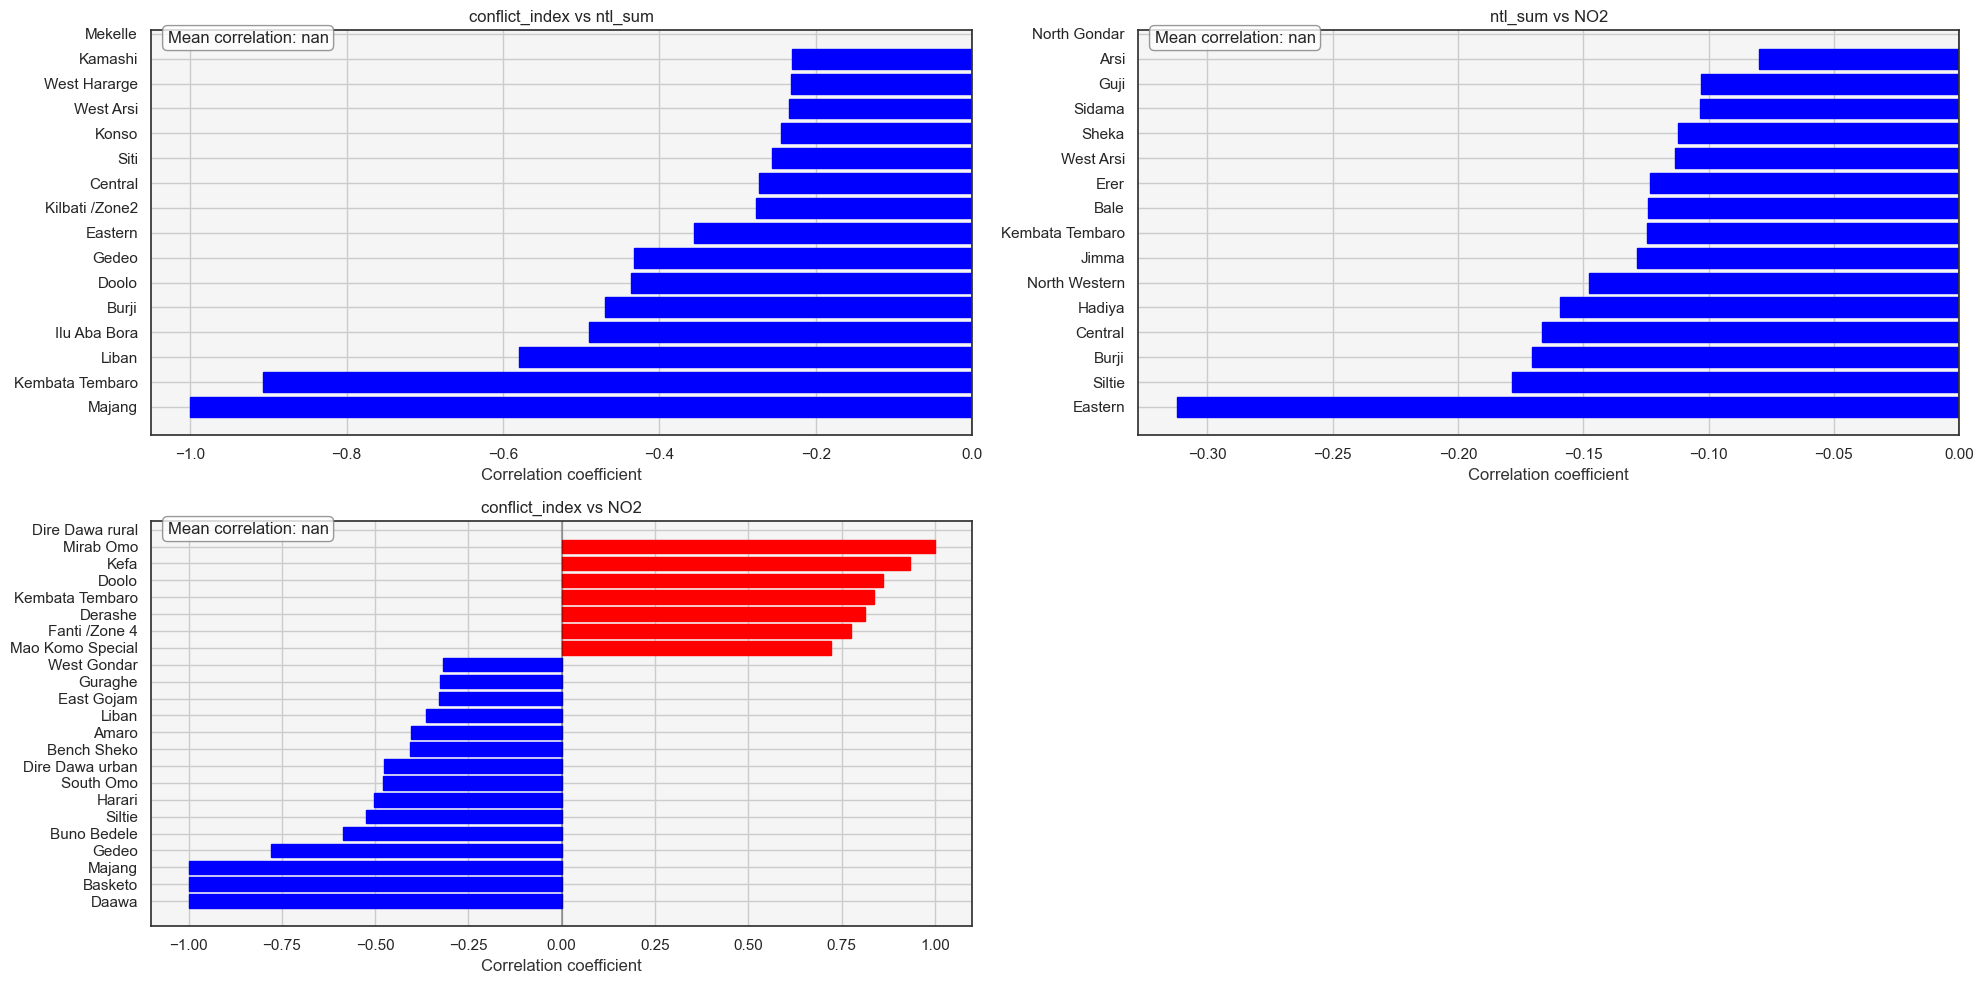

In [242]:
variables_of_interest = ['NO2', 'nrFatalities', 'nrEvents', 'conflict_index', 
                         'ntl_sum']

results = main(merged_adm2,admin_level='ADM2_EN')

# Define the variable pairs we want to examine
variable_pairs = [
    ('conflict_index', 'ntl_sum'),
    ('ntl_sum', 'NO2'),
    #('ntl_sum', 'evi_median'),
   # ('evi_median', 'NO2'),
   ('conflict_index', 'NO2'),
    #('evi_median', 'ntl_sum')  # This is a duplicate of the third pair, you may want to replace it
]

# Create the subplot figure with all correlation distributions
fig = plot_multiple_correlation_distributions(results['region_correlations'], variable_pairs)

# Show the figure
plt.show()

## Comparing Temporal Correlation and Spatial Correlation at Regional Level

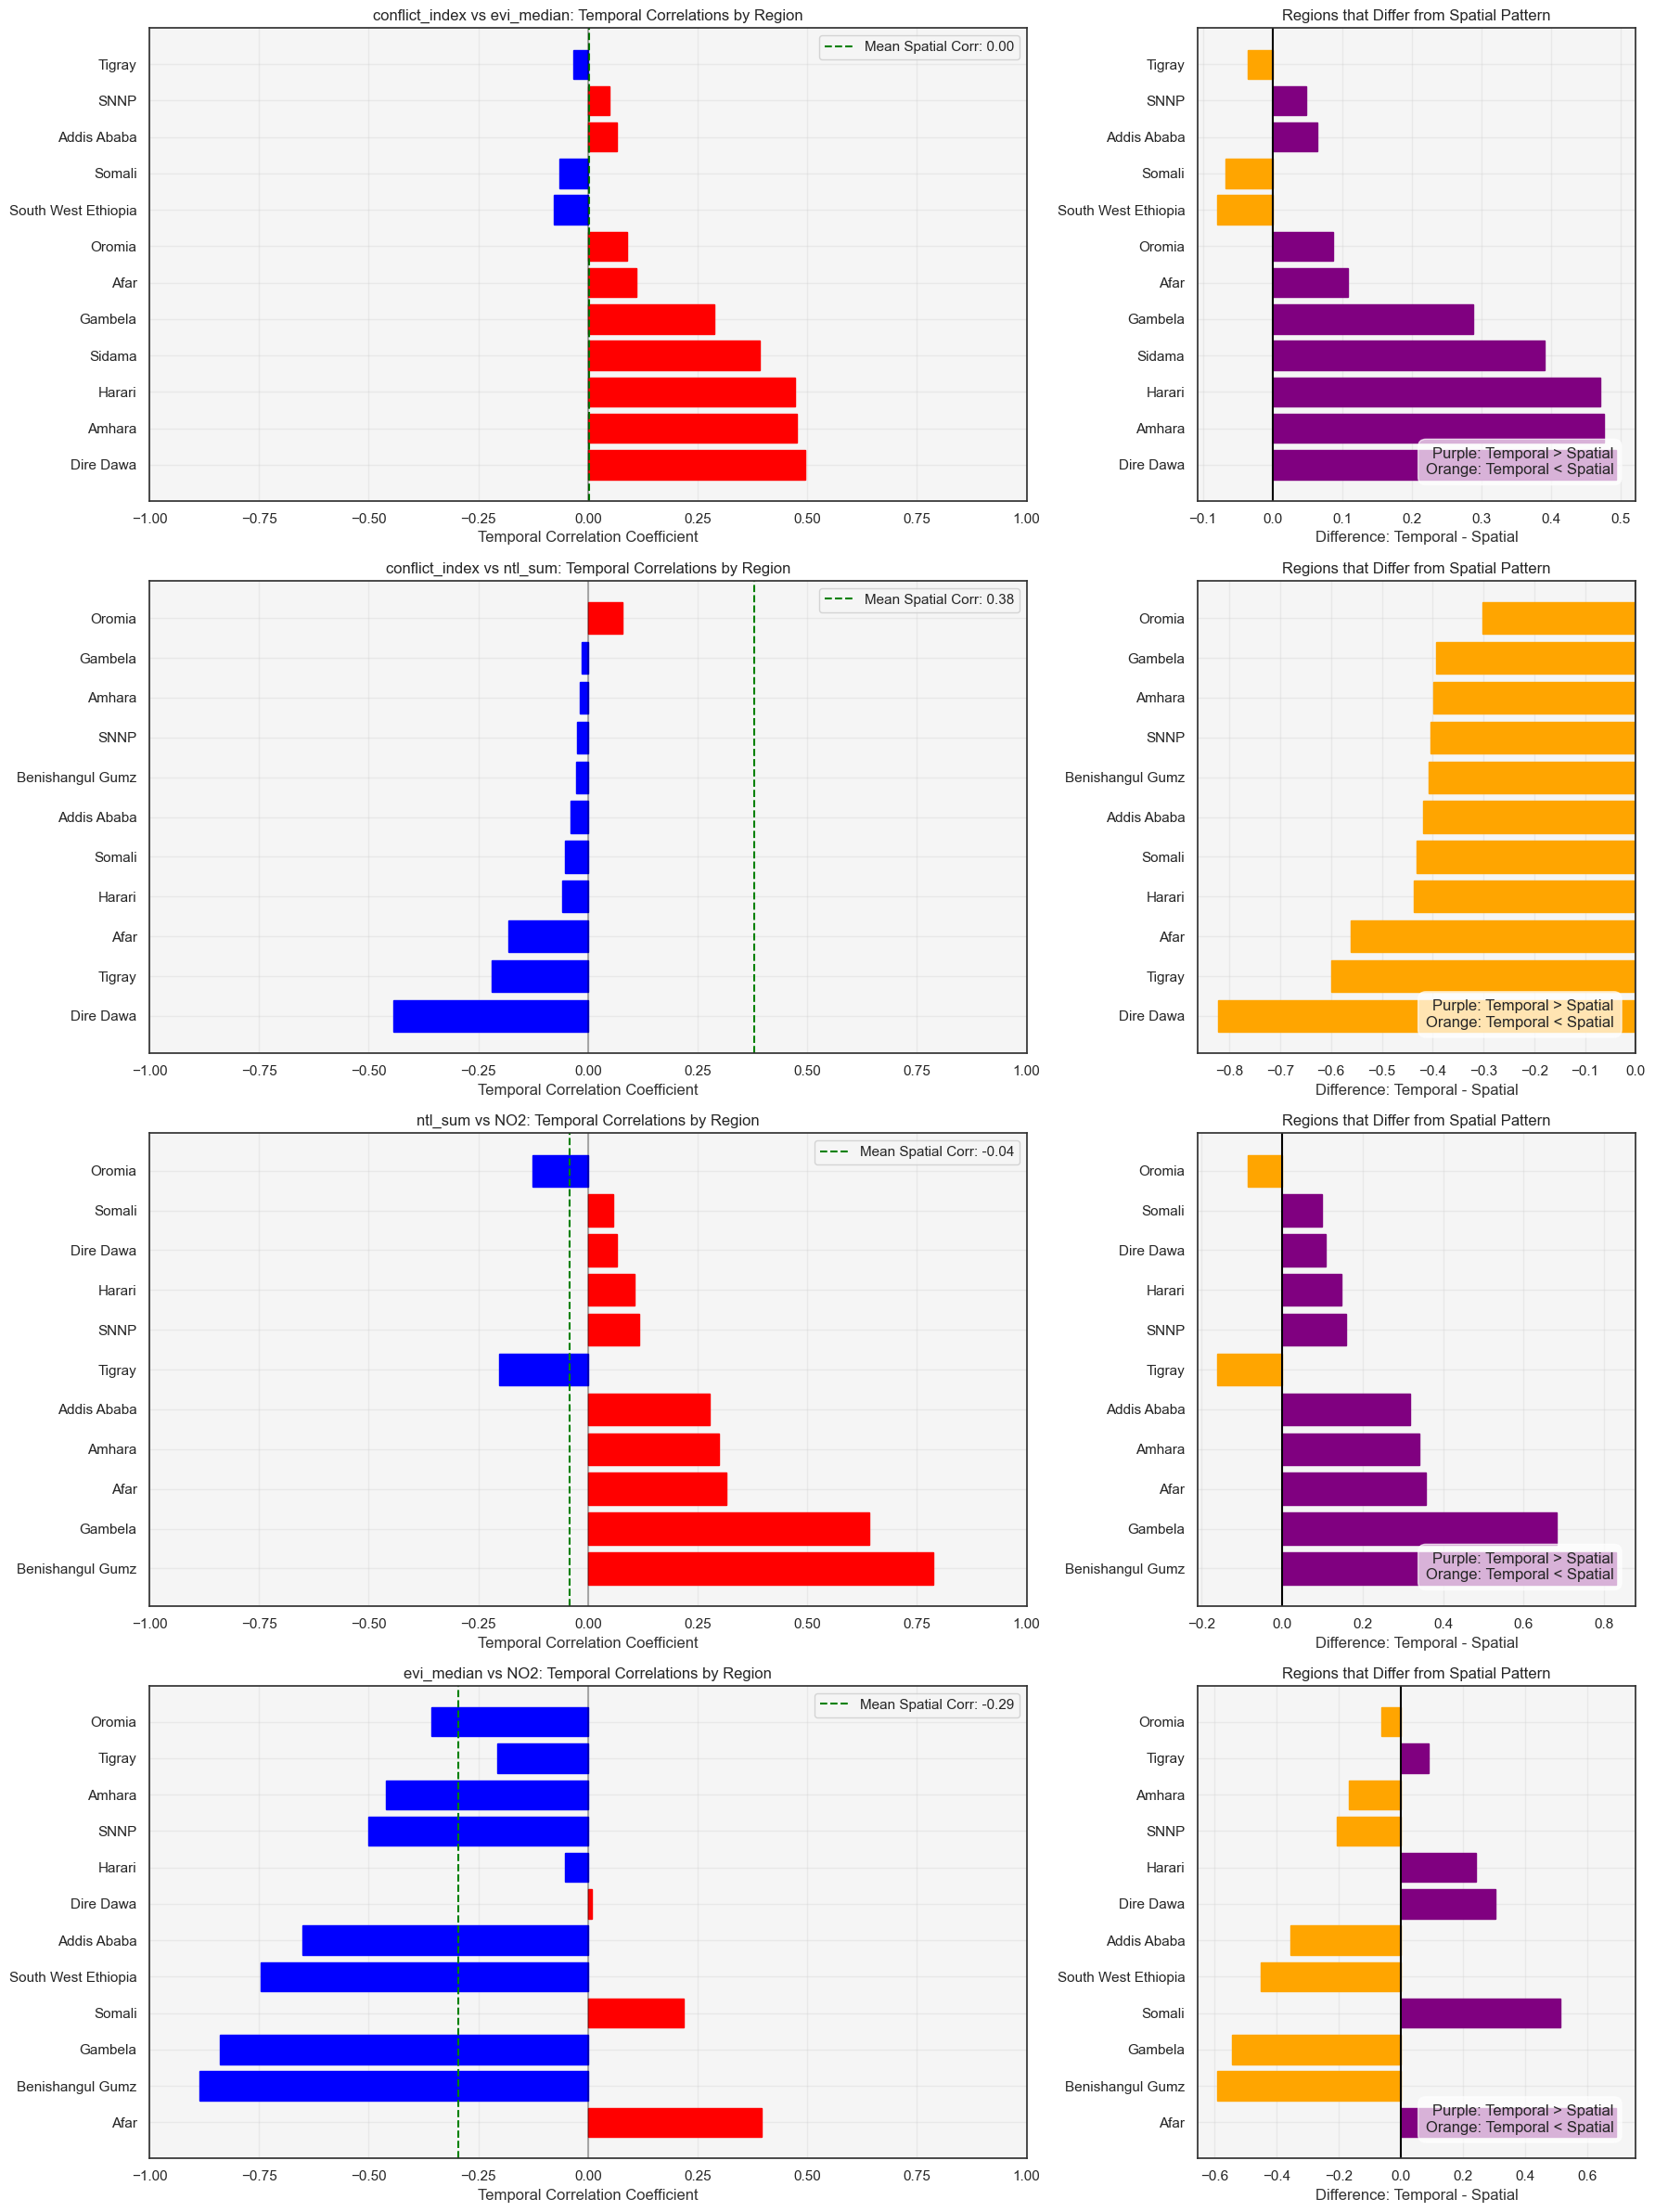

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_temporal_spatial_correlations(df):
    """
    Analyze both temporal and spatial correlations in the dataset
    
    Parameters:
    - df: DataFrame containing the columns: 'ADM0_EN', 'ADM1_EN', 'date', 
          'conflict_index', 'NO2', 'ntl_sum', 'evi_median', etc.
    
    Returns:
    - Dictionary containing temporal and spatial correlation results
    """
    # Define variables of interest
    variables = ['conflict_index', 'NO2', 'ntl_sum', 'evi_median']
    variable_pairs = [
        ('conflict_index', 'ntl_sum'),
        ('ntl_sum', 'NO2'),
        ('ntl_sum', 'evi_median'),
        ('evi_median', 'NO2'),
        ('conflict_index', 'evi_median'),
        ('conflict_index', 'NO2')
    ]
    
    # Convert date to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    
    # Ensure we have all required columns
    for var in variables:
        if var not in df.columns:
            raise ValueError(f"Required column '{var}' not found in DataFrame")
    
    # Step 1: Calculate temporal correlations for each region
    regions = df['ADM1_EN'].unique()
    temporal_correlations = {}
    
    for region in regions:
        region_data = df[df['ADM1_EN'] == region].sort_values('date')
        
        # Skip regions with insufficient data points
        if len(region_data) < 5:
            continue
        
        # Calculate correlation matrix for this region over time
        corr_matrix = pd.DataFrame(index=variables, columns=variables)
        
        for var1 in variables:
            for var2 in variables:
                # Get the time series for each variable
                time_series1 = region_data[var1]
                time_series2 = region_data[var2]
                
                # Check for enough non-null data points
                valid_data = ~(time_series1.isnull() | time_series2.isnull())
                if valid_data.sum() < 5:
                    corr_matrix.loc[var1, var2] = np.nan
                    continue
                
                # Calculate Pearson correlation
                corr, p_value = stats.pearsonr(
                    time_series1[valid_data], 
                    time_series2[valid_data]
                )
                
                corr_matrix.loc[var1, var2] = corr
        
        temporal_correlations[region] = corr_matrix
    
    # Step 2: Calculate spatial correlations for each time period
    time_periods = df['date'].dt.to_period('Q').unique()  # Quarterly periods
    spatial_correlations = {}
    
    for period in time_periods:
        # Filter data for this time period
        period_start = period.start_time
        period_end = period.end_time
        period_data = df[(df['date'] >= period_start) & (df['date'] <= period_end)]
        
        # Skip periods with insufficient data
        if len(period_data) < 5:
            continue
        
        # Calculate spatial correlation matrix for this time period
        # by calculating correlations across regions
        corr_matrix = pd.DataFrame(index=variables, columns=variables)
        
        # Group by region and calculate mean values
        region_means = period_data.groupby('ADM1_EN')[variables].mean().reset_index()
        
        for var1 in variables:
            for var2 in variables:
                # Get the spatial distribution for each variable
                spatial_var1 = region_means[var1]
                spatial_var2 = region_means[var2]
                
                # Check for enough non-null data points
                valid_data = ~(spatial_var1.isnull() | spatial_var2.isnull())
                if valid_data.sum() < 5:
                    corr_matrix.loc[var1, var2] = np.nan
                    continue
                
                # Calculate Pearson correlation
                corr, p_value = stats.pearsonr(
                    spatial_var1[valid_data], 
                    spatial_var2[valid_data]
                )
                
                corr_matrix.loc[var1, var2] = corr
        
        spatial_correlations[period] = corr_matrix
    
    # Step 3: Compare temporal and spatial correlations
    comparison_results = {}
    
    for var1, var2 in variable_pairs:
        # Get temporal correlations for this variable pair across regions
        temp_corrs = {
            region: corr_matrix.loc[var1, var2]
            for region, corr_matrix in temporal_correlations.items()
            if not np.isnan(corr_matrix.loc[var1, var2])
        }
        
        # Get spatial correlations for this variable pair across time periods
        spatial_corrs = {
            period: corr_matrix.loc[var1, var2]
            for period, corr_matrix in spatial_correlations.items()
            if not np.isnan(corr_matrix.loc[var1, var2])
        }
        
        # Find regions where temporal correlation differs most from mean spatial correlation
        mean_spatial_corr = np.mean(list(spatial_corrs.values()))
        
        region_differences = {
            region: corr - mean_spatial_corr
            for region, corr in temp_corrs.items()
        }
        
        comparison_results[(var1, var2)] = {
            'temporal_correlations': temp_corrs,
            'spatial_correlations': spatial_corrs,
            'mean_spatial_correlation': mean_spatial_corr,
            'region_differences': region_differences
        }
    
    return {
        'temporal_correlations': temporal_correlations,
        'spatial_correlations': spatial_correlations,
        'comparison_results': comparison_results
    }

def plot_temporal_spatial_comparison(comparison_results, var1, var2):
    """
    Create visualizations comparing temporal and spatial correlations
    
    Parameters:
    - comparison_results: Output from analyze_temporal_spatial_correlations
    - var1, var2: Variable names to compare
    
    Returns:
    - Matplotlib figure
    """
    results = comparison_results['comparison_results'].get((var1, var2))
    if not results:
        return None
    
    # Extract data
    temporal_corrs = results['temporal_correlations']
    mean_spatial_corr = results['mean_spatial_correlation']
    region_differences = results['region_differences']
    
    # Sort regions by difference from mean spatial correlation
    sorted_regions = sorted(
        region_differences.keys(),
        key=lambda r: region_differences[r]
    )
    
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 10))
    
    # Subplot 1: Temporal correlations by region vs mean spatial correlation
    plt.subplot(1, 2, 1)
    
    # Plot bars for temporal correlations
    region_values = [temporal_corrs[region] for region in sorted_regions]
    bars = plt.barh(sorted_regions, region_values)
    
    # Color bars by sign
    for i, bar in enumerate(bars):
        bar.set_color('red' if region_values[i] > 0 else 'blue')
    
    # Add vertical line for mean spatial correlation
    plt.axvline(x=mean_spatial_corr, color='green', linestyle='--', 
                label=f'Mean Spatial Correlation: {mean_spatial_corr:.2f}')
    
    plt.xlabel('Correlation Coefficient')
    plt.title(f'Temporal Correlation of {var1} vs {var2} by Region')
    plt.xlim(-1, 1)
    plt.legend()
    
    # Subplot 2: Difference from spatial mean
    plt.subplot(1, 2, 2)
    
    # Plot difference bars
    diff_values = [region_differences[region] for region in sorted_regions]
    diff_bars = plt.barh(sorted_regions, diff_values)
    
    # Color bars by sign
    for i, bar in enumerate(diff_bars):
        bar.set_color('purple' if diff_values[i] > 0 else 'orange')
    
    plt.axvline(x=0, color='black', linestyle='-')
    plt.xlabel('Difference from Mean Spatial Correlation')
    plt.title(f'Regions where Temporal Pattern Differs from Spatial Pattern')
    
    plt.tight_layout()
    return fig

def create_improved_comparison_dashboard(analysis_results, variable_pairs):
    """
    Create a cleaner dashboard comparing temporal and spatial correlations
    
    Parameters:
    - analysis_results: Output from analyze_temporal_spatial_correlations
    - variable_pairs: List of tuples with variable names to compare
    
    Returns:
    - Matplotlib figure
    """
    n_pairs = len(variable_pairs)
    fig, axes = plt.subplots(n_pairs, 2, figsize=(18, 6 * n_pairs), gridspec_kw={'width_ratios': [2, 1]})
    
    if n_pairs == 1:
        axes = np.array([axes])  # Convert to 2D array for consistent indexing
    
    for i, (var1, var2) in enumerate(variable_pairs):
        # Get comparison data
        results = analysis_results['comparison_results'].get((var1, var2))
        if not results:
            axes[i, 0].text(0.5, 0.5, f'No data available for {var1} vs {var2}', 
                          ha='center', va='center')
            axes[i, 1].text(0.5, 0.5, f'No data available', 
                          ha='center', va='center')
            continue
        
        # Extract data
        temporal_corrs = results['temporal_correlations']
        mean_spatial_corr = results['mean_spatial_correlation']
        region_differences = results['region_differences']
        
        # Sort regions by absolute difference from mean spatial correlation
        sorted_regions = sorted(
            region_differences.keys(),
            key=lambda r: abs(region_differences[r]),
            reverse=True
        )
        
        # Limit to top 12 regions with biggest differences for readability
        if len(sorted_regions) > 12:
            sorted_regions = sorted_regions[:12]
        
        # Left plot: Temporal correlations 
        ax1 = axes[i, 0]
        
        region_values = [temporal_corrs[region] for region in sorted_regions]
        bars1 = ax1.barh(sorted_regions, region_values)
        
        # Color bars by sign
        for j, bar in enumerate(bars1):
            bar.set_color('red' if region_values[j] > 0 else 'blue')
        
        # Add vertical line for mean spatial correlation
        ax1.axvline(x=mean_spatial_corr, color='green', linestyle='--', 
                  label=f'Mean Spatial Corr: {mean_spatial_corr:.2f}')
        ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        ax1.set_xlabel('Temporal Correlation Coefficient')
        ax1.set_title(f'{var1} vs {var2}: Temporal Correlations by Region', fontsize=12)
        ax1.set_xlim(-1, 1)
        ax1.grid(True, alpha=0.3)
        ax1.legend(loc='best')
        
        # Right plot: Difference from spatial mean
        ax2 = axes[i, 1]
        
        diff_values = [region_differences[region] for region in sorted_regions]
        bars2 = ax2.barh(sorted_regions, diff_values)
        
        # Color bars by difference direction
        for j, bar in enumerate(bars2):
            # Purple if temporal correlation is stronger than spatial
            # Orange if temporal correlation is weaker than spatial
            bar.set_color('purple' if diff_values[j] > 0 else 'orange')
        
        ax2.axvline(x=0, color='black', linestyle='-')
        ax2.set_xlabel('Difference: Temporal - Spatial')
        ax2.set_title('Regions that Differ from Spatial Pattern', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        # Add descriptions of what colors mean
        ax2.text(0.95, 0.05, 
                'Purple: Temporal > Spatial\nOrange: Temporal < Spatial', 
                transform=ax2.transAxes, ha='right', va='bottom',
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))
    
    plt.tight_layout()
    return fig

# Add a function to create a summary table of regions with conflicting patterns
def create_pattern_conflict_summary(analysis_results, variable_pairs):
    """
    Create a summary of regions where temporal and spatial patterns conflict
    
    Parameters:
    - analysis_results: Output from analyze_temporal_spatial_correlations
    - variable_pairs: List of tuples with variable names to compare
    
    Returns:
    - DataFrame summarizing regions with conflicting patterns
    """
    conflict_data = []
    
    for var1, var2 in variable_pairs:
        results = analysis_results['comparison_results'].get((var1, var2))
        if not results:
            continue
        
        temporal_corrs = results['temporal_correlations']
        mean_spatial_corr = results['mean_spatial_correlation']
        
        # Find regions where temporal and spatial correlations have opposite signs
        for region, temp_corr in temporal_corrs.items():
            # Check if temporal and spatial correlations have opposite signs
            if temp_corr * mean_spatial_corr < 0:
                conflict_data.append({
                    'Variable Pair': f'{var1} vs {var2}',
                    'Region': region,
                    'Temporal Correlation': temp_corr,
                    'Spatial Correlation': mean_spatial_corr,
                    'Difference': temp_corr - mean_spatial_corr,
                    'Pattern Conflict': 'Yes'
                })
    
    if not conflict_data:
        return pd.DataFrame(columns=[
            'Variable Pair', 'Region', 'Temporal Correlation', 
            'Spatial Correlation', 'Difference', 'Pattern Conflict'
        ])
    
    # Convert to DataFrame and sort by absolute difference
    conflict_df = pd.DataFrame(conflict_data)
    conflict_df['Abs Difference'] = conflict_df['Difference'].abs()
    conflict_df = conflict_df.sort_values('Abs Difference', ascending=False)
    conflict_df = conflict_df.drop('Abs Difference', axis=1)
    
    return conflict_df

# Example usage:
results = analyze_temporal_spatial_correlations(merged_adm1)
# 
# # Define variable pairs to examine
variable_pairs = [
    ('conflict_index', 'evi_median'),
    ('conflict_index', 'ntl_sum'),
    ('ntl_sum', 'NO2'),
    ('evi_median', 'NO2')
]
# 
# # Create comparison dashboard
fig = create_improved_comparison_dashboard(results, variable_pairs)
plt.show()

## Evolution of Spatial Correlation

In [226]:
def analyze_spatial_pattern_evolution(df, variables_of_interest, time_frequency='Q'):
    """
    Analyze how spatial correlation patterns evolve over time
    
    Parameters:
    - df: DataFrame with columns ADM1_EN, date, and variables of interest
    - variables_of_interest: List of variables to analyze
    - time_frequency: Time grouping frequency (Q=quarterly, M=monthly, Y=yearly)
    
    Returns:
    - Dictionary with time period as key and spatial correlation matrix as value
    """
    # Ensure date is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    
    # Group data by time periods
    df['time_period'] = df['date'].dt.to_period(time_frequency)
    time_periods = sorted(df['time_period'].unique())
    
    # Store spatial correlation matrices for each time period
    spatial_evolution = {}
    
    # Create variable pairs for correlation analysis
    variable_pairs = []
    for i, var1 in enumerate(variables_of_interest):
        for var2 in variables_of_interest[i+1:]:
            variable_pairs.append((var1, var2))
    
    # Calculate spatial correlations for each time period
    for period in time_periods:
        period_data = df[df['time_period'] == period]
        
        # Need enough regions for meaningful spatial correlation
        if period_data['ADM1_EN'].nunique() < 5:
            continue
            
        # Calculate regional means for this time period
        region_means = period_data.groupby('ADM1_EN')[variables_of_interest].mean()
        
        # Calculate correlation matrix across regions
        spatial_corr = region_means.corr(method='pearson')
        spatial_evolution[period] = spatial_corr
    
    # Extract correlation values for each variable pair over time
    correlation_trends = {}
    for var1, var2 in variable_pairs:
        values = []
        periods = []
        
        for period, corr_matrix in spatial_evolution.items():
            if var1 in corr_matrix.columns and var2 in corr_matrix.columns:
                values.append(corr_matrix.loc[var1, var2])
                periods.append(period)
        
        if values:
            correlation_trends[(var1, var2)] = pd.Series(values, index=periods)
    
    return {
        'spatial_correlations': spatial_evolution,
        'correlation_trends': correlation_trends
    }

def plot_spatial_correlation_evolution(evolution_results, var1, var2):
    """
    Plot how spatial correlation between two variables evolves over time
    
    Parameters:
    - evolution_results: Output from analyze_spatial_pattern_evolution
    - var1, var2: Variable names to analyze
    
    Returns:
    - Matplotlib figure
    """
    trend = evolution_results['correlation_trends'].get((var1, var2))
    if trend is None:
        # Try reversed order
        trend = evolution_results['correlation_trends'].get((var2, var1))
    
    if trend is None or len(trend) < 2:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.text(0.5, 0.5, f'Insufficient data for {var1} vs {var2}',
               ha='center', va='center')
        return fig
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Convert period index to datetime for better plotting
    trend.index = [period.to_timestamp() for period in trend.index]
    
    # Plot the correlation trend
    ax.plot(trend.index, trend.values, 'o-', linewidth=2, markersize=8)
    
    # Color points by correlation value
    for i, (date, corr) in enumerate(zip(trend.index, trend.values)):
        color = 'red' if corr > 0 else 'blue'
        ax.plot(date, corr, 'o', color=color, markersize=8)
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add reference lines
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.3)
    ax.axhline(y=-0.5, color='gray', linestyle='--', alpha=0.3)
    
    # Set labels and title
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Spatial Correlation Coefficient')
    ax.set_title(f'Evolution of Spatial Correlation Between {var1} and {var2} Over Time')
    
    # Set y-axis limits
    ax.set_ylim(-1.1, 1.1)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Format x-axis dates
    fig.autofmt_xdate()
    
    # Add annotations for significant changes
    if len(trend) > 2:
        changes = trend.diff().abs()
        significant_changes = changes[changes > 0.3].index  # Adjust threshold as needed
        
        for date in significant_changes:
            i = trend.index.get_loc(date)
            if i > 0:
                prev_date = trend.index[i-1]
                ax.annotate(
                    f'Change: {trend[date] - trend[prev_date]:.2f}',
                    xy=(date, trend[date]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2')
                )
    
    plt.tight_layout()
    return fig

def create_spatial_evolution_dashboard(evolution_results, variable_pairs):
    """
    Create a dashboard showing the evolution of multiple spatial correlations
    
    Parameters:
    - evolution_results: Output from analyze_spatial_pattern_evolution
    - variable_pairs: List of tuples with variable names to analyze
    
    Returns:
    - Matplotlib figure
    """
    n_pairs = len(variable_pairs)
    fig, axes = plt.subplots(n_pairs, 1, figsize=(12, 5 * n_pairs))
    
    if n_pairs == 1:
        axes = [axes]
    
    for i, (var1, var2) in enumerate(variable_pairs):
        ax = axes[i]
        
        trend = evolution_results['correlation_trends'].get((var1, var2))
        if trend is None:
            # Try reversed order
            trend = evolution_results['correlation_trends'].get((var2, var1))
        
        if trend is None or len(trend) < 2:
            ax.text(0.5, 0.5, f'Insufficient data for {var1} vs {var2}',
                   ha='center', va='center')
            continue
        
        # Convert period index to datetime for better plotting
        trend.index = [period.to_timestamp() for period in trend.index]
        
        # Plot the correlation trend
        ax.plot(trend.index, trend.values, 'o-', linewidth=2, markersize=8)
        
        # Color points by correlation value
        for date, corr in zip(trend.index, trend.values):
            color = 'red' if corr > 0 else 'blue'
            ax.plot(date, corr, 'o', color=color, markersize=8)
        
        # Add horizontal line at zero
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        # Set labels and title
        ax.set_xlabel('Time Period')
        ax.set_ylabel('Correlation')
        ax.set_title(f'{var1} vs {var2}')
        
        # Set y-axis limits
        ax.set_ylim(-1.1, 1.1)
        
        # Add grid
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

### Regional Level

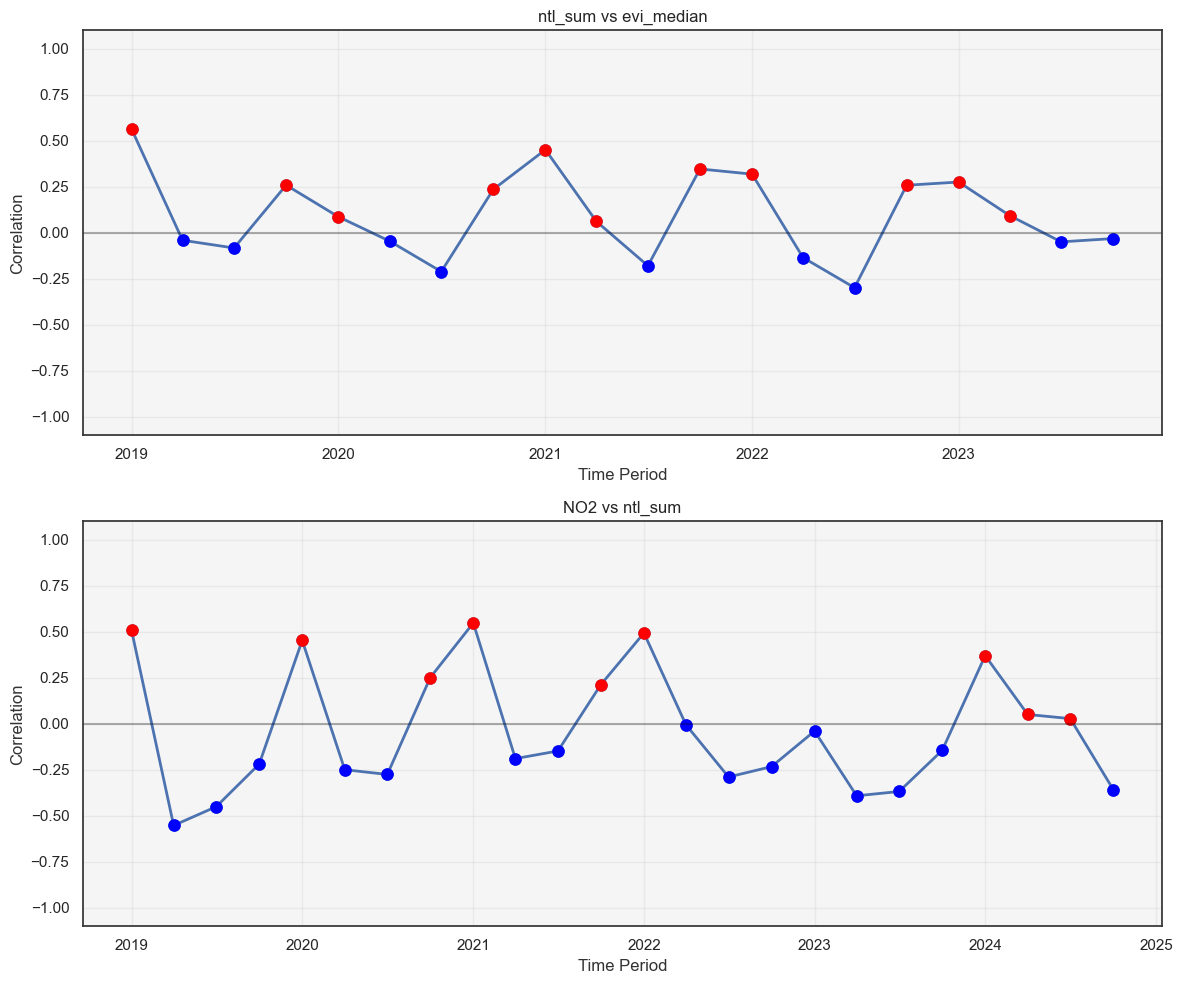

In [227]:
evolution_results = analyze_spatial_pattern_evolution(merged_adm1, ['conflict_index', 'NO2', 'ntl_sum', 'evi_median'])
variable_pairs = [('ntl_sum', 'evi_median'), ('NO2', 'ntl_sum')]
fig = create_spatial_evolution_dashboard(evolution_results, variable_pairs)

### Zonal Level

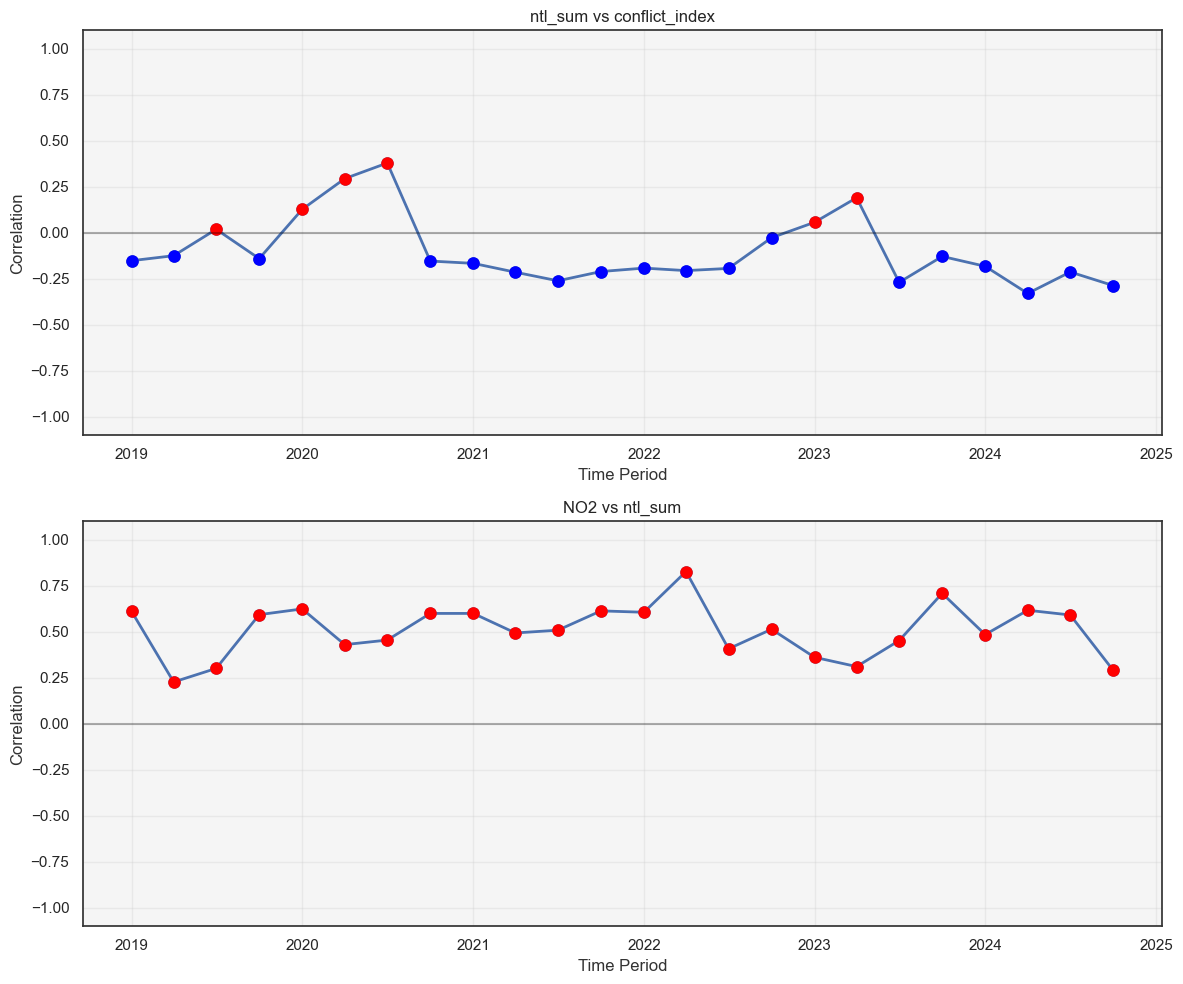

In [244]:
evolution_results = analyze_spatial_pattern_evolution(merged_adm2, ['conflict_index', 'NO2', 'ntl_sum'])
variable_pairs = [('ntl_sum', 'conflict_index'), ('NO2', 'ntl_sum')]
fig = create_spatial_evolution_dashboard(evolution_results, variable_pairs)